DATA TRANSFORMATION

Solar Generation 2022

In [ ]:
import pandas as pd
file_path = '/content/Solar_Generation_Outputs_2022.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', header=None)
data_frames = []
current_installation = None
headers = ['Year', 'Hour', 'Size', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
last_processed_index = -1


for index, row in df.iterrows():

    if index <= last_processed_index:
        continue
    if 'Adjusted' in str(row[0]):
        current_installation = row[0]
        continue
    if row[0] == 'Year' and row[1] == 'Hour':
        column_names = row.values
        data_start = index + 1
        continue

    if current_installation and index >= data_start:

        if pd.isna(row[0]):
            continue


        data_end = index
        while data_end < len(df) and not pd.isna(df.iloc[data_end, 0]):
            data_end += 1
        installation_data = df.iloc[index:data_end].copy()
        installation_data.columns = column_names
        installation_data['Installation'] = current_installation
        if not installation_data.empty:
            data_frames.append(installation_data)
        last_processed_index = data_end - 1
if data_frames:
    combined_df = pd.concat(data_frames).drop_duplicates()
else:
    raise ValueError("No valid data found in the Excel file")
melted = pd.melt(combined_df,
                id_vars=['Installation', 'Year', 'Hour', 'Size'],
                value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                var_name='Month',
                value_name='Generation')
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
melted['Month'] = melted['Month'].map(month_map)
final_df = melted[['Installation', 'Year', 'Month', 'Hour', 'Size', 'Generation']]
final_df = final_df.drop_duplicates().reset_index(drop=True)

duplicate_check = final_df.duplicated(subset=['Installation', 'Year', 'Month', 'Hour']).sum()
if duplicate_check > 0:
    print(f"Warning: {duplicate_check} duplicates found after processing")
    final_df = final_df.drop_duplicates(subset=['Installation', 'Year', 'Month', 'Hour'])
output_path = '/content/Solar_Generation_Outputs_2022_Transformed.xlsx'
final_df.to_excel(output_path, index=False)

print("Data transformation complete. Saved to:", output_path)
print(f"Final dataset contains {len(final_df)} rows")
print("Sample data:")
final_df.head()

Solar Generation 2023

In [ ]:
import pandas as pd
file_path = '/content/Solar_Generation_Outputs_2023.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', header=None)
data_frames = []
current_installation = None
headers = ['Year', 'Size', 'Hour', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for index, row in df.iterrows():

    if 'Adjusted' in str(row[0]):
        current_installation = row[0]
        continue


    if row[0] == 'Year' and row[1] == 'Size':
        column_names = row.values
        data_start = index + 1
        continue

    if current_installation and index >= data_start:

        if pd.isna(row[0]):
            continue
        data_end = index
        while data_end < len(df) and not pd.isna(df.iloc[data_end, 0]):
            data_end += 1

        installation_data = df.iloc[index:data_end].copy()
        installation_data.columns = column_names
        installation_data['Installation'] = current_installation
        data_frames.append(installation_data)
        index = data_end - 1
combined_df = pd.concat(data_frames)
melted = pd.melt(combined_df,
                id_vars=['Installation', 'Year', 'Size', 'Hour'],
                value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                var_name='Month',
                value_name='Generation')

month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
melted['Month'] = melted['Month'].map(month_map)

final_df = melted[['Installation', 'Year', 'Month', 'Hour', 'Size', 'Generation']]

output_path = '/content/Solar_Generation_Outputs_2023_Transformed.xlsx'
final_df.to_excel(output_path, index=False)

print("Data transformation complete. Saved to:", output_path)
final_df.head()

Solar Generation 2024

In [ ]:
import pandas as pd

file_path = '/content/Solar_Generation_Outputs_2024.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', header=None)

data_frames = []
current_installation = None
headers = ['Year', 'Size', 'Hour', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
last_processed_index = -1


for index, row in df.iterrows():
    if index <= last_processed_index:
        continue
    if isinstance(row[0], str) and 'Adjusted' in row[0]:
        current_installation = row[0]
        continue
    if isinstance(row[0], str) and row[0] == 'Year' and row[1] == 'Size' and row[2] == 'Hour':
        column_names = row.values
        data_start = index + 1
        continue
    if current_installation and index >= data_start:

        if pd.isna(row[0]):
            continue
        data_end = index
        while data_end < len(df) and not pd.isna(df.iloc[data_end, 0]):
            data_end += 1
        installation_data = df.iloc[index:data_end].copy()
        installation_data.columns = column_names
        installation_data['Installation'] = current_installation
        data_frames.append(installation_data)
        last_processed_index = data_end - 1

if data_frames:
    combined_df = pd.concat(data_frames)
    combined_df = combined_df.drop_duplicates()

    month_cols = [col for col in combined_df.columns if col in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

    melted = pd.melt(combined_df,
                    id_vars=['Installation', 'Year', 'Size', 'Hour'],
                    value_vars=month_cols,
                    var_name='Month',
                    value_name='Generation')
    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    melted['Month'] = melted['Month'].map(month_map)
    final_df = melted[['Installation', 'Year', 'Month', 'Hour', 'Size', 'Generation']]
    final_df = final_df.drop_duplicates(subset=['Installation', 'Year', 'Month', 'Hour'])
    output_path = '/content/Solar_Generation_Outputs_2024_Transformed.xlsx'
    final_df.to_excel(output_path, index=False)

    print("Data transformation complete. Saved to:", output_path)
    print("\nFirst 5 rows of transformed data:")
    print(final_df.head())
    print("\nShape of final dataframe:", final_df.shape)
else:
    print("No valid data found in the Excel file.")

LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - loss: 0.0195 - val_loss: 0.0160 - learning_rate: 0.0010
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0131 - val_loss: 0.0155 - learning_rate: 0.0010
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0122 - val_loss: 0.0159 - learning_rate: 0.0010
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0122 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 5/30
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0130
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0130 - val_loss: 0.0159 - learning_rate: 0.0010
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0124 - val_loss: 0.0168 - learning_rate: 5.0000e-04
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0134 - val_loss: 0.0153 - learning_rate: 5.0000e-04
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0134 - val_loss: 0.0165 - learning_

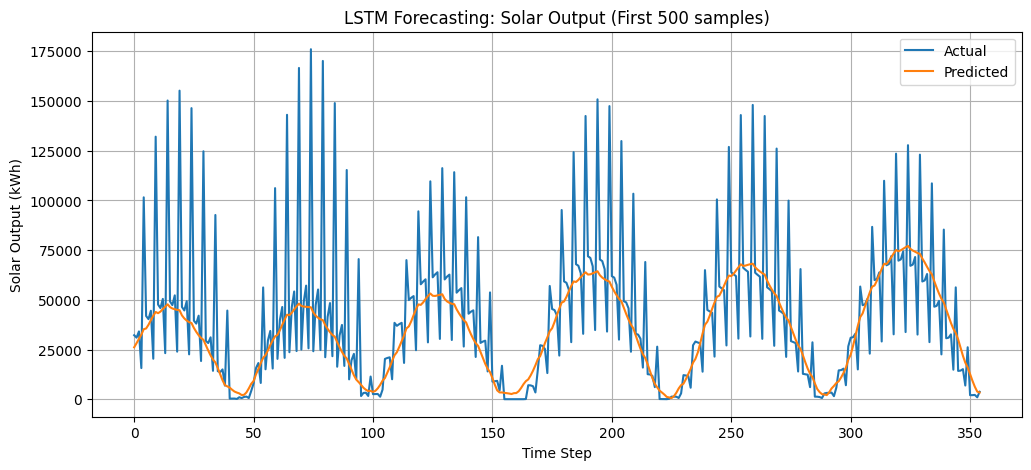

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
weather_df = pd.read_excel("/content/Averaged Weather.xlsx")
solar_2022 = pd.read_excel("/content/Solar_Generation_Outputs_2022_Transformed.xlsx")
solar_2023 = pd.read_excel("/content/Solar_Generation_Outputs_2023_Transformed.xlsx")
solar_2024 = pd.read_excel("/content/Solar_Generation_Outputs_2024_Transformed.xlsx")
solar_df = pd.concat([solar_2022, solar_2023, solar_2024], ignore_index=True)
merged = pd.merge(weather_df, solar_df, on=['Year', 'Month', 'Hour'], how='inner')
merged = merged.dropna()

merged = merged.drop(columns=['Installation'])

merged['Size'] = pd.to_numeric(merged['Size'], errors='coerce')
merged = merged.dropna()
features = merged.drop(columns=['Year', 'Month', 'Hour', 'Solar_Output_kWh'])
target = merged['Solar_Output_kWh']
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))


def create_sequences(X, y, seq_length=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X_scaled, y_scaled)


X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])), # Stacked LSTM layers
    Dropout(0.2),

    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), callbacks=[lr_reduction], verbose=1)

y_pred_scaled = model.predict(X_val).flatten()

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_val_original = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_val_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_val_original, y_pred))
r2 = r2_score(y_val_original, y_pred)
mape = mean_absolute_percentage_error(y_val_original, y_pred)

print(f"LSTM Performance → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")

plt.figure(figsize=(12, 5))
plt.plot(y_val_original[:500], label='Actual')
plt.plot(y_pred[:500], label='Predicted')
plt.title("LSTM Forecasting: Solar Output (First 500 samples)")
plt.xlabel("Time Step")
plt.ylabel("Solar Output (kWh)")
plt.legend()
plt.grid(True)
plt.show()


GRU

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 489ms/step - loss: 0.0456 - val_loss: 0.0167 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - loss: 0.0192 - val_loss: 0.0142 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step - loss: 0.0154 - val_loss: 0.0152 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 532ms/step - loss: 0.0124 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 550ms/step - loss: 0.0112 - val_loss: 0.0166 - learning_rate: 0.0010
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 0.0131
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - loss: 0.0130 - val_loss: 0.0149 - learning_rate: 0.0010
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - loss: 0.0104 - val_loss: 0.0130 - learning_rate: 5.0000e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - loss: 0.0099 - val_loss: 0.012

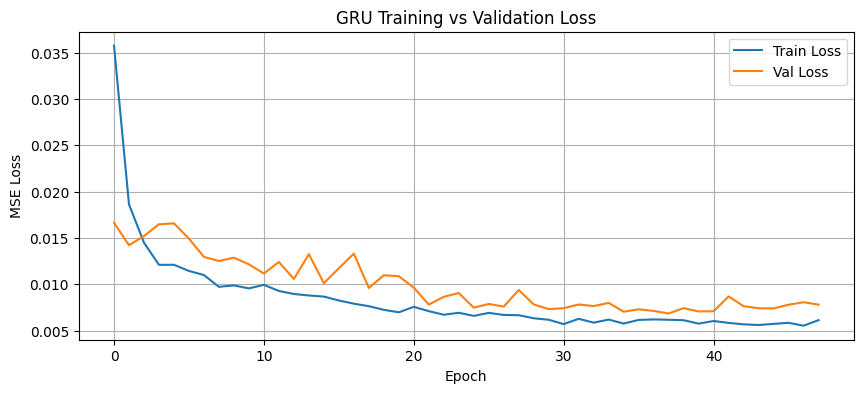

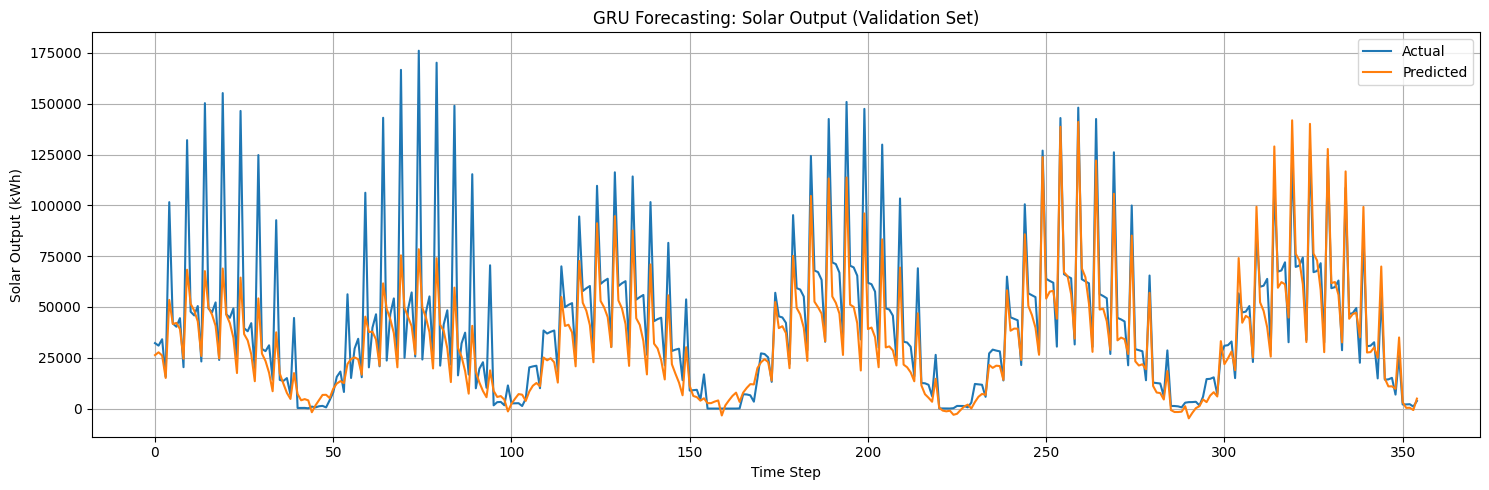

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input, LayerNormalization, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam


def load_and_merge_data(weather_path, solar_paths):
    weather_df = pd.read_excel(weather_path)
    solar_dfs = [pd.read_excel(path) for path in solar_paths]
    solar_df = pd.concat(solar_dfs, ignore_index=True)

    merged = pd.merge(weather_df, solar_df, on=['Year', 'Month', 'Hour'], how='inner').dropna()
    merged.drop(columns=['Installation'], inplace=True)
    merged['Size'] = pd.to_numeric(merged['Size'], errors='coerce')
    merged.dropna(inplace=True)

    return merged

def preprocess_data(df, target_column='Solar_Output_kWh'):
    X = df.drop(columns=['Year', 'Month', 'Hour', target_column])
    y = df[target_column]

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

    return X_scaled, y_scaled, scaler_X, scaler_y

def create_sequences(X, y, seq_length=24):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)


def build_gru_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LayerNormalization(),
        Bidirectional(GRU(128, activation='tanh', return_sequences=True)),
        Dropout(0.3),
        Bidirectional(GRU(64, activation='tanh')),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    return model


def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print(f"GRU Performance → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%")


def plot_loss(history):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("GRU Training vs Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(15, 5))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title("GRU Forecasting: Solar Output (Validation Set)")
    plt.xlabel("Time Step")
    plt.ylabel("Solar Output (kWh)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def main():

    weather_path = "/content/Averaged Weather.xlsx"
    solar_paths = [
        "/content/Solar_Generation_Outputs_2022_Transformed.xlsx",
        "/content/Solar_Generation_Outputs_2023_Transformed.xlsx",
        "/content/Solar_Generation_Outputs_2024_Transformed.xlsx"
    ]
    merged_df = load_and_merge_data(weather_path, solar_paths)
    X_scaled, y_scaled, scaler_X, scaler_y = preprocess_data(merged_df)
    X_seq, y_seq = create_sequences(X_scaled, y_scaled)

    X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

    model = build_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, min_lr=1e-6),
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    ]


    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )


    y_pred_scaled = model.predict(X_val).flatten()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_true = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()

    evaluate_model(y_true, y_pred)
    plot_loss(history)
    plot_predictions(y_true, y_pred)
if __name__ == "__main__":
    main()


Transformers

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.1175 - val_loss: 0.0317 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0498 - val_loss: 0.0261 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0422 - val_loss: 0.0278 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0336 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0311 - val_loss: 0.0230 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0298 - val_loss: 0.0241 - learning_rate: 0.0010
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0287 - val_loss: 0.0191 - learning_rate: 0.0010
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0280 - val_loss: 0.0194 - learning_rate: 0.0010
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0254 - val_loss: 0.0183 - learning_rate: 0.0010
Epoch 10/50
23/23 ━

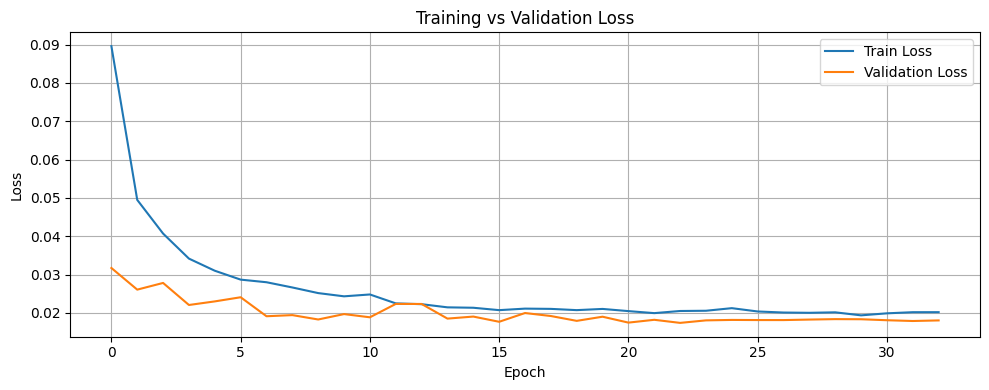

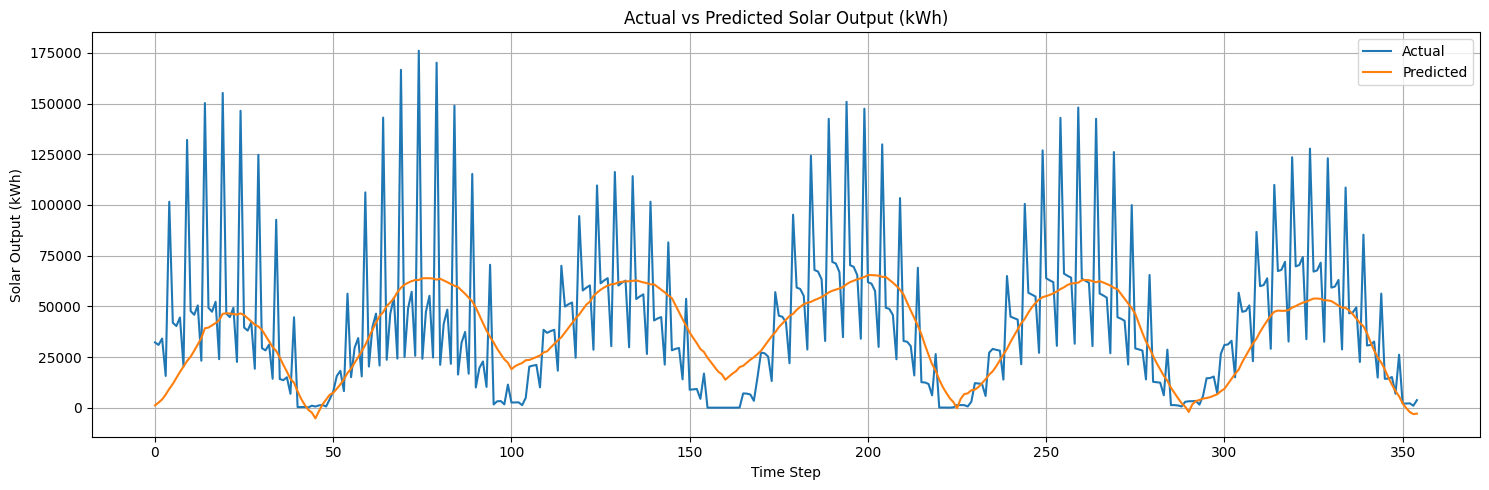

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, GlobalAveragePooling1D, Add
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
weather_df = pd.read_excel("/content/Averaged Weather.xlsx")
solar_2022 = pd.read_excel("/content/Solar_Generation_Outputs_2022_Transformed.xlsx")
solar_2023 = pd.read_excel("/content/Solar_Generation_Outputs_2023_Transformed.xlsx")
solar_2024 = pd.read_excel("/content/Solar_Generation_Outputs_2024_Transformed.xlsx")
solar_df = pd.concat([solar_2022, solar_2023, solar_2024], ignore_index=True)
merged = pd.merge(weather_df, solar_df, on=['Year', 'Month', 'Hour'], how='inner')
merged = merged.drop(columns=['Installation'], errors='ignore')
merged['Size'] = pd.to_numeric(merged['Size'], errors='coerce')
merged = merged.dropna()
features = merged.drop(columns=['Year', 'Month', 'Hour', 'Solar_Output_kWh'])
target = merged['Solar_Output_kWh']
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))
def create_sequences(X, y, seq_len=24):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i + seq_len])
        ys.append(y[i + seq_len])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled)
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = Add()([attention, inputs])
    x = LayerNormalization(epsilon=1e-6)(attention)

    ff = Dense(ff_dim, activation="relu")(x)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Dropout(dropout)(ff)
    out = Add()([x, ff])
    return LayerNormalization(epsilon=1e-6)(out)
input_shape = X_train.shape[1:]
inputs = Input(shape=input_shape)
x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.2)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.compile(optimizer="adam", loss="mse")
lr_schedule = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[lr_schedule, early_stop],
    verbose=1
)
y_pred_scaled = model.predict(X_val).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_val.reshape(-1, 1)).flatten()
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100

print(f"\nTransformer Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.2f}%")
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted Solar Output (kWh)")
plt.xlabel("Time Step")
plt.ylabel("Solar Output (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
